# Análisis de los diferentes datasets

En este notebook cargaremos y limpiaremos los dataset definitivos, dejándolos listos para su análisis.

# 1 - Limpiar y combinar datasets

In [1]:
# Libraries
import os
import re
import sys
import time

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
import seaborn as sns

# Validate if the path exists before adding it
current_directory = os.getcwd()
root_path = os.path.abspath(os.path.join(current_directory, '..')) 
if os.path.exists(root_path) and root_path not in sys.path: 
    sys.path.append(root_path)
                        
from utils import vizdatatools as viz
from utils.functions import convert_coordinate

## 1.1 - Cargar datasets

In [2]:
# Load datasets
df_idema = pd.read_csv('../data/raw/EMA_info_raw.csv')
df_month_year_climate = pd.read_csv('../data/raw/BC_month_year_climate_raw.csv')
df_anual_climate = pd.read_csv('../data/raw/BC_anual_climate_raw.csv')

# display(df_idema.info())
# display(df_month_year_climate.info())
# display(df_anual_climate.info())


## 1.2 Inspección dataset "EMA_info"

In [3]:
df_idema.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   latitud    947 non-null    object 
 1   provincia  947 non-null    object 
 2   altitud    947 non-null    int64  
 3   idema      947 non-null    object 
 4   nombre     947 non-null    object 
 5   indsinop   301 non-null    float64
 6   longitud   947 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 51.9+ KB


In [4]:
df_idema

,latitud,provincia,altitud,idema,nombre,indsinop,longitud
0,394924N,ILLES BALEARS,490,B013X,"ESCORCA, LLUC",8304.0,025309E
1,394744N,ILLES BALEARS,5,B051A,"SÓLLER, PUERTO",8316.0,024129E
2,394121N,ILLES BALEARS,60,B087X,BANYALBUFAR,NaN,023046E
3,393445N,ILLES BALEARS,52,B103B,ANDRATX - SANT ELM,99103.0,022208E
4,393305N,ILLES BALEARS,50,B158X,"CALVIÀ, ES CAPDELLÀ",NaN,022759E
...,...,...,...,...,...,...,...
942,424131N,LLEIDA,2467,9988B,CAP DE VAQUÈIRA,8936.0,005826E
943,424201N,LLEIDA,1161,9990X,"NAUT ARAN, ARTIES",8107.0,005237E
944,424634N,LLEIDA,722,9994X,BOSSÒST,NaN,004123E
945,430528N,NAVARRA,334,9995Y,VALCARLOS/LUZAIDE,NaN,011803W


Longitud y Latitud son "strings" y quiero convertirlos en números enteros para poder pintarlos en un scatter en el fúturo.

Las coordenadas geográficas suelen tener la siguiente estructura:

- Latitud: grados (0-90) con una dirección (N o S).
- Longitud: grados (0-180) con una dirección (E o W).

En España solo tenemos latitudes N, y longitudes E y W (separadas por el meridiano de Greenwich). Hay que aplicar una conversión para poder trabajar con los datos que proporciona AEMET. Para ello he contruido la función `convert_coordinate`


In [5]:
df_idema['latitud'] = df_idema['latitud'].apply(convert_coordinate)
df_idema['longitud'] = df_idema['longitud'].apply(convert_coordinate)

In [6]:
df_idema

,latitud,provincia,altitud,idema,nombre,indsinop,longitud
0,39.823333,ILLES BALEARS,490,B013X,"ESCORCA, LLUC",8304.0,2.885833
1,39.795556,ILLES BALEARS,5,B051A,"SÓLLER, PUERTO",8316.0,2.691389
2,39.689167,ILLES BALEARS,60,B087X,BANYALBUFAR,NaN,2.512778
3,39.579167,ILLES BALEARS,52,B103B,ANDRATX - SANT ELM,99103.0,2.368889
4,39.551389,ILLES BALEARS,50,B158X,"CALVIÀ, ES CAPDELLÀ",NaN,2.466389
...,...,...,...,...,...,...,...
942,42.691944,LLEIDA,2467,9988B,CAP DE VAQUÈIRA,8936.0,0.973889
943,42.700278,LLEIDA,1161,9990X,"NAUT ARAN, ARTIES",8107.0,0.876944
944,42.776111,LLEIDA,722,9994X,BOSSÒST,NaN,0.689722
945,43.091111,NAVARRA,334,9995Y,VALCARLOS/LUZAIDE,NaN,-1.300833


In [7]:
df_idema.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   latitud    947 non-null    float64
 1   provincia  947 non-null    object 
 2   altitud    947 non-null    int64  
 3   idema      947 non-null    object 
 4   nombre     947 non-null    object 
 5   indsinop   301 non-null    float64
 6   longitud   947 non-null    float64
dtypes: float64(3), int64(1), object(3)
memory usage: 51.9+ KB


Ahora ya tengo una coordenadas numéricas con las que puedo trabajar

<Axes: xlabel='longitud', ylabel='latitud'>

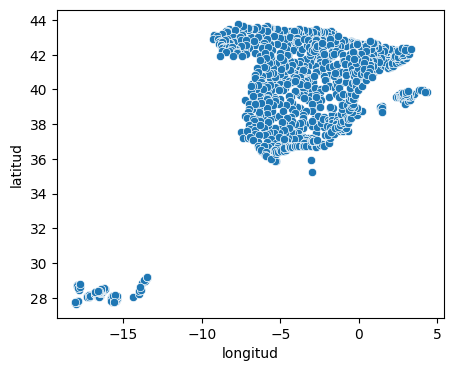

In [8]:
plt.figure(figsize=(5, 4))
sns.scatterplot(df_idema, x = 'longitud', y = 'latitud')

In [9]:
# Save dataset processed
df_idema.to_csv('../data/processed/EMA_info.csv', index = False)

## 1.3 Inspección dataset "BC_anual_climate
"

In [10]:
df_anual_climate

,fecha,idema,p_max,hr,nw_55,tm_min,ta_max,ts_min,nt_30,w_racha,...,q_max,q_mar,q_med,q_min,inso,p_sol,ts_20,ts_10,ts_50,glo
0,2009,1012P,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2010,1012P,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2011,1012P,NaN,74.0,NaN,12.0,39.1(21/ago),21.6,10.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2012,1012P,67.0(20/oct),75.0,28.0,10.7,38.2(17/ago),22.1,16.0,26/24.4(05/ene),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2013,1012P,89.2(08/jun),76.0,44.0,10.9,37.6(31/jul),21.0,5.0,23/27.5(26/ene),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
949,2020,9178X,34.0(06/nov),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
950,2021,9178X,NaN,73.0,NaN,6.9,40.0(14/ago),20.8,29.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
951,2022,9178X,27.0(09/ene),69.0,NaN,7.6,40.9(16/jul),20.8,57.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
952,2023,9178X,52.8(01/sep),71.0,NaN,7.6,40.0(24/ago),24.2,37.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
